<a href="https://colab.research.google.com/github/dandamudi-geeta/SPR/blob/main/2348512_SPR(Lab6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Given vectors
vector_1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])  # Reference vector
vector_2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])  # Test vector


Dynamic Time Warping (DTW) is a well-established algorithm used for measuring the similarity between temporal sequences that may vary in speed. This technique is particularly effective in aligning sequences that are similar but may have temporal discrepancies, such as different speeds in data acquisition.

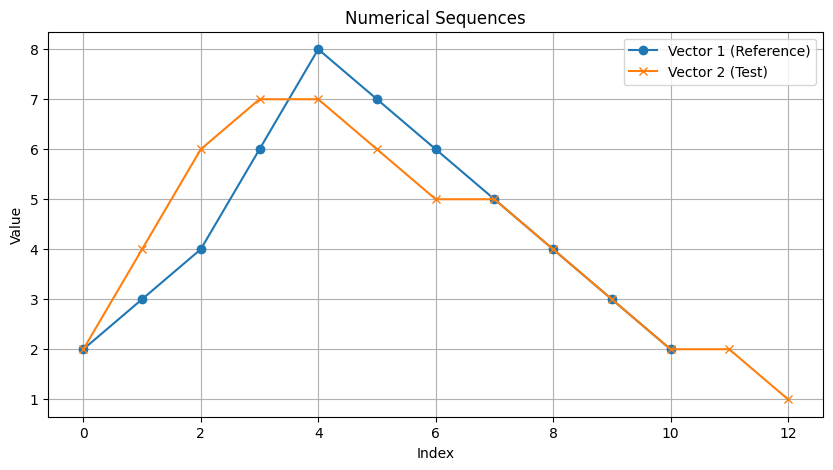

In [3]:
# (a) Plot both vectors to visualize patterns
plt.figure(figsize=(10, 5))
plt.plot(vector_1, label="Vector 1 (Reference)", marker='o')
plt.plot(vector_2, label="Vector 2 (Test)", marker='x')
plt.title("Numerical Sequences")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

In [4]:
# (b) Implement Dynamic Time Warping (DTW) algorithm
def compute_dtw(vector_1, vector_2):
    n, m = len(vector_1), len(vector_2)
    dtw_matrix = np.full((n + 1, m + 1), float('inf'))
    dtw_matrix[0, 0] = 0

    # Fill the DTW matrix
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(vector_1[i - 1] - vector_2[j - 1])
            dtw_matrix[i, j] = cost + min(
                dtw_matrix[i - 1, j],     # Insertion
                dtw_matrix[i, j - 1],     # Deletion
                dtw_matrix[i - 1, j - 1]  # Match
            )

    return dtw_matrix

In [5]:
# Compute DTW matrix
dtw_matrix = compute_dtw(vector_1, vector_2)


In [6]:

# (c) Compute the accumulated cost matrix
print("Accumulated Cost Matrix:")
print(dtw_matrix[1:, 1:])


Accumulated Cost Matrix:
[[ 0.  2.  6. 11. 16. 20. 23. 26. 28. 29. 29. 29. 30.]
 [ 1.  1.  4.  8. 12. 15. 17. 19. 20. 20. 21. 22. 24.]
 [ 3.  1.  3.  6.  9. 11. 12. 13. 13. 14. 16. 18. 21.]
 [ 7.  3.  1.  2.  3.  3.  4.  5.  7. 10. 14. 18. 23.]
 [13.  7.  3.  2.  3.  5.  6.  7.  9. 12. 16. 20. 25.]
 [18. 10.  4.  2.  2.  3.  5.  7. 10. 13. 17. 21. 26.]
 [22. 12.  4.  3.  3.  2.  3.  4.  6.  9. 13. 17. 22.]
 [25. 13.  5.  5.  5.  3.  2.  2.  3.  5.  8. 11. 15.]
 [27. 13.  7.  8.  8.  5.  3.  3.  2.  3.  5.  7. 10.]
 [28. 14. 10. 11. 12.  8.  5.  5.  3.  2.  3.  4.  6.]
 [28. 16. 14. 15. 16. 12.  8.  8.  5.  3.  2.  2.  3.]]


In [7]:
# (d) Find and visualize the warping path
def find_warping_path(dtw_matrix):
    i, j = len(vector_1), len(vector_2)
    path = [(i - 1, j - 1)]

    while i > 1 or j > 1:
        if i == 1:
            j -= 1
        elif j == 1:
            i -= 1
        else:
            direction = np.argmin([
                dtw_matrix[i - 1, j],     # Up
                dtw_matrix[i, j - 1],     # Left
                dtw_matrix[i - 1, j - 1]  # Diagonal
            ])
            if direction == 0:
                i -= 1
            elif direction == 1:
                j -= 1
            else:
                i -= 1
                j -= 1
        path.append((i - 1, j - 1))

    return path[::-1]

warping_path = find_warping_path(dtw_matrix)


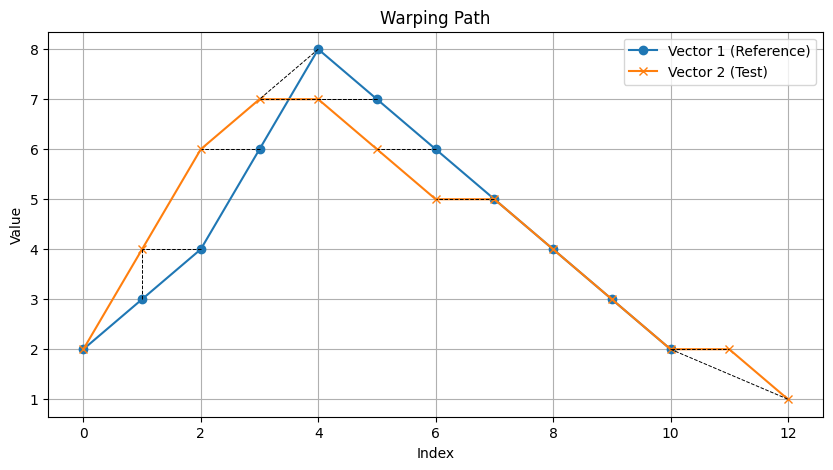

In [8]:
# Visualize the warping path
plt.figure(figsize=(10, 5))
plt.plot(vector_1, label="Vector 1 (Reference)", marker='o')
plt.plot(vector_2, label="Vector 2 (Test)", marker='x')
for (i, j) in warping_path:
    plt.plot([i, j], [vector_1[i], vector_2[j]], 'k--', linewidth=0.7)
plt.title("Warping Path")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()


In [9]:

# (e) Calculate the DTW distance
dtw_distance = dtw_matrix[len(vector_1), len(vector_2)]
print(f"DTW Distance: {dtw_distance}")

DTW Distance: 3.0


In [10]:
# (f) Inference
print("\nInference:")
print("The warping path aligns elements of Vector 1 and Vector 2 to minimize the cumulative cost.")
print("The DTW distance quantifies the similarity between the vectors, with a lower value indicating higher similarity.")


Inference:
The warping path aligns elements of Vector 1 and Vector 2 to minimize the cumulative cost.
The DTW distance quantifies the similarity between the vectors, with a lower value indicating higher similarity.
